# 1.KNN Algorithm

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
df = pd.read_csv("G:/anurag1241/datascience/Machine learning/unsupervised/Classified Data",index_col=0)

In [25]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop("TARGET CLASS",axis=1))
scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [27]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.2)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [30]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[97 12]
 [ 5 86]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       109
           1       0.88      0.95      0.91        91

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



#Choosing the K-value

In [32]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

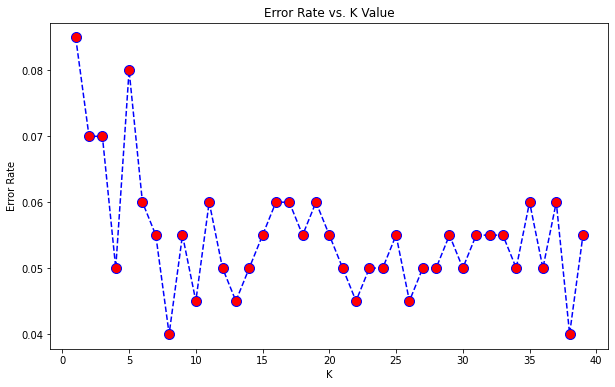

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[98 11]
 [ 3 88]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       109
           1       0.89      0.97      0.93        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



# 2.DBSCAN Clustering

In [35]:
dataset = pd.read_csv('G:/anurag1241/datascience/Machine learning/unsupervised/Mall_Customers.csv')
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [36]:
X = dataset.iloc[:, [3, 4]].values

In [37]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [38]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [40]:
model=dbscan.fit(X)
labels=model.labels_

In [41]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [42]:
from sklearn import metrics

In [44]:
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [45]:
sample_cores[dbscan.core_sample_indices_]=True

In [46]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


# 3.PCA[Principal Component Analysis]

In [47]:
from sklearn.datasets import load_breast_cancer

In [50]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [55]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [56]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [57]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [60]:
x_pca = pca.transform(scaled_data)

In [61]:
scaled_data.shape

(569, 30)

In [62]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

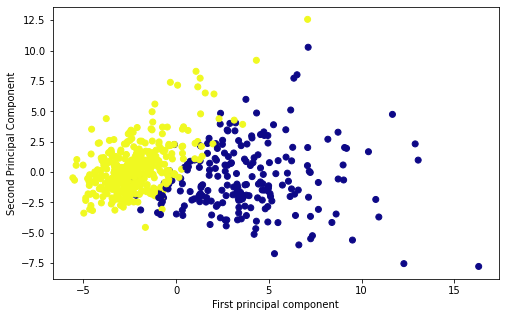

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [66]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [67]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [68]:
df_comp.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

<AxesSubplot:>

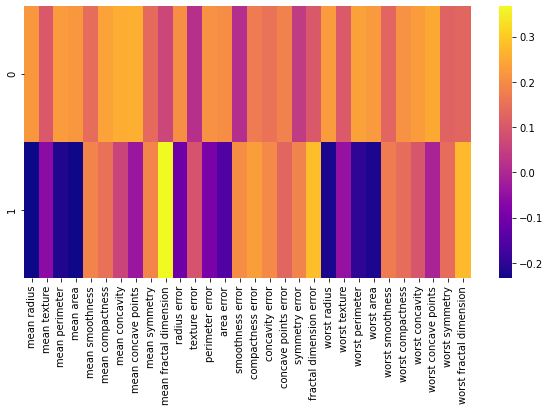

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(df_comp,cmap='plasma',)